In [9]:
import numpy as np
import script
import pylab as plt
import nibabel as nib
import os
from skimage import filters
import scipy.ndimage as ndi
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_fill_holes as bfh
from scipy.ndimage.morphology import binary_dilation as bd
from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import grey_dilation as gd
import BET
import morphsnakes.morphsnakes as morphsnakes
import time
from skimage.segmentation import find_boundaries as boundaries

In [10]:
planes = np.load('planes.npy')

samps = ['Sample-1', 'Sample-2', 'Sample-3', 'Sample-4', 'Sample-5', 'Sample-A',
 'Sample-B', 'Sample-C', 'Sample-D', 'Sample-F', 'Sample-G', 'Sample-H',
 'Sample-I']

reshaped_niftis = []
for i in range(len(samps)):
    reshaped_niftis.append(os.path.join('/Users/Sinead/DC-project/Post-unskewed-reshaped/', 
                                        '{}.nii.gz'.format(samps[i])))

In [11]:
i = 5
path = reshaped_niftis[i]
samp = samps[i]

In [12]:
img = nib.load(path)
array = img.get_data()
thresholded = np.multiply(array, np.multiply(array>0, array<100).astype(int))

In [13]:
# spaced = BET.spacer(thresholded)
# spaced2 = BET.spacer(spaced)

In [14]:
data = BET.extract(thresholded, samp)

In [15]:
def spacer(data):
    grad = abs(np.gradient(data)[0])
    mask1 = grad<8
    mask2 = grad>0
    mask3 = np.multiply(mask1,mask2) 
    mask4 = (mask3.astype(int)+bounds.astype(int))>0
    result = np.multiply(data, mask4)
    return result

<IPython.core.display.Javascript object>


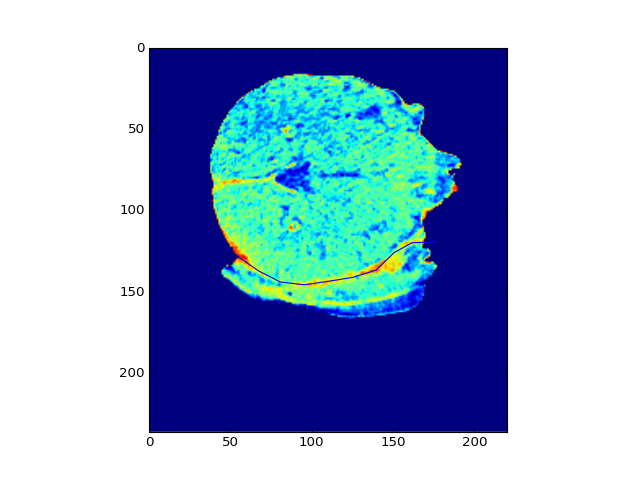

Click on points to draw a line which marks a boundary for the brain. To stop drawing, double click


In [210]:
%matplotlib nbagg

from ipywidgets import interact, fixed



slice_no = 80
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data[:,:,slice_no])
ax.set_xlim([0, data.shape[1]])
ax.set_ylim([data.shape[0], 0])
plt.ion()

coords = []
spline = []
length1 = 1
length0 = 0

def pltspline(ax, spl):
    ax.imshow(data[:,:,80])
    x = spl[0]
    y = spl[1]
    if len(ax.lines):
        ax.lines[0].set_xdata(x)
        ax.lines[0].set_ydata(y)
    else:
        ax.plot(x,y)
    fig.canvas.draw()

def onclick(event):
    global ix, iy, iz
    ix, iy, iz = event.xdata, event.ydata, slice_no
    global coords
    coords.append((ix, iy, iz))
    
    from math import ceil, floor
    np_coords = np.array(coords)
    x = np_coords[:,0]
    y = np_coords[:,1]
    tck, u = interpolate.splprep([x, y], s=0)
    global spline 
    spline = interpolate.splev(np.linspace(u[0], u[-1], len(u)), tck)
#     if len(coords)>0:
    interact(pltspline, ax=fixed(ax), spl=fixed(spline))
    if event.dblclick: fig.canvas.mpl_disconnect(cid)
    return None
print('Click on points to draw a line which marks a boundary for the brain. To stop drawing, double click')
cid = fig.canvas.mpl_connect('button_press_event', onclick)


In [211]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4446187/figure/F1/
# reference FSL BET